# Exploiting the Signal-Leak Bias in Diffusion Models
[![Open This Demo In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/IVRL/signal-leak-bias/blob/main/5min-demo.ipynb)

**Project page and Research paper:** https://ivrl.github.io/signal-leak-bias

**Link to this demo:** https://ivrl.github.io/signal-leak-bias/demo

[![arXiv](https://img.shields.io/badge/arXiv-2309.15842-red)](https://arxiv.org/abs/2309.15842)
[![Project Page](https://img.shields.io/badge/Project%20Page-IVRL-blue)](https://ivrl.github.io/signal-leak-bias/)
[![Proceedings](https://img.shields.io/badge/WACV%20Proceedings-CVF-blue)](https://openaccess.thecvf.com/content/WACV2024/html/Everaert_Exploiting_the_Signal-Leak_Bias_in_Diffusion_Models_WACV_2024_paper.html)
[![Code](https://img.shields.io/badge/Code-Github-black)](https://github.com/IVRL/signal-leak-bias)


## Who am I?

**Martin Nicolas Everaert**

PhD student at EPFL - IVRL

https://martin-ev.github.io/

## Intro

In this demo, we will explore the key findings from my paper titled
<strong>"Exploiting the Signal-Leak Bias in Diffusion Models"</strong> (WACV 2024).

Feel free to reach out to me if you have any questions or feedback!

## Setup and Imports

Here, we install the **🤗 Diffusers** library, and import the necessary components for the demo.

This demo borrows code / is built on top of the **🤗 Diffusers** library.

In [1]:
!pip install diffusers==0.32.1
!pip install transformers==4.47.1
!pip install accelerate==1.2.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 67.5 MB/s eta 0:00:00
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.32.2
    Uninstalling diffusers-0.32.2:
      Successfully uninstalled diffusers-0.32.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 101.2 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.48.3
    Uninstalling transformers-4.48.3:
      Successfully uninstalled transformers-4.48.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.4/336.4 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
from torchvision import transforms
from diffusers import DiffusionPipeline
from diffusers.utils import load_image
from diffusers.utils.torch_utils import randn_tensor

_ = torch.set_grad_enabled(False)
gpu = torch.device('cuda')

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

## Load Stable Diffusion 2.1

We load the model from HuggingFace.

In [3]:
pipeline = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1",
    torch_dtype=torch.float16
)
pipeline = pipeline.to(gpu)
pipeline.scheduler.config.timestep_spacing = "trailing"

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

## Success and Failures of Stable Diffusion

### It often works well

A professional photograph of an astronaut mowing the lawn. Moon in the background. Colorful image, hyperrealistic, fantasy, dark art.


  0%|          | 0/50 [00:00<?, ?it/s]

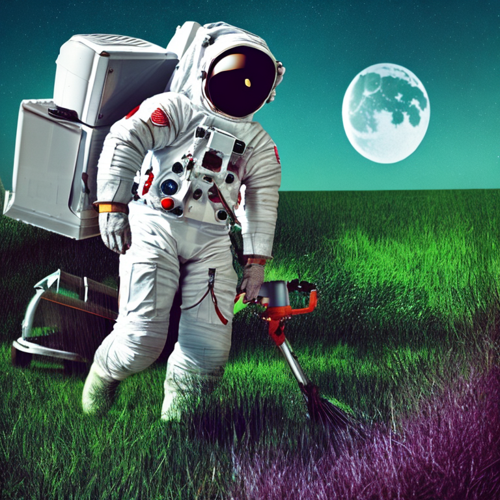

In [4]:
prompt = "A professional photograph of an astronaut mowing the lawn. Moon in the background. Colorful image, hyperrealistic, fantasy, dark art."
print(prompt)

image = pipeline(prompt).images[0]

display(image.resize((500,500)))

 ### But it fails on simple prompts such as "solid red background" on "drawing on a white background"

A solid red background.


  0%|          | 0/50 [00:00<?, ?it/s]

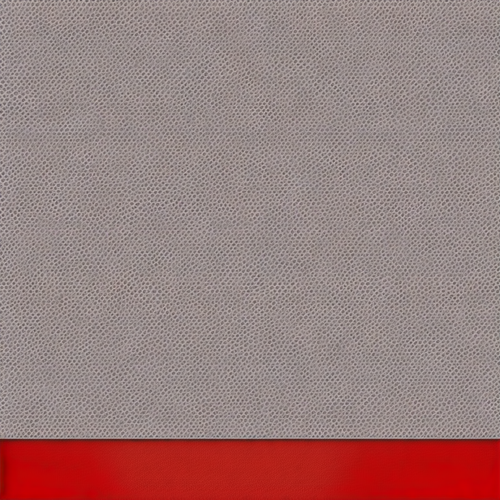

In [5]:
prompt = "A solid red background."
print(prompt)

image = pipeline(prompt).images[0]

display(image.resize((500,500)))

A drawing of a squirrel on a completely white background.


  0%|          | 0/50 [00:00<?, ?it/s]

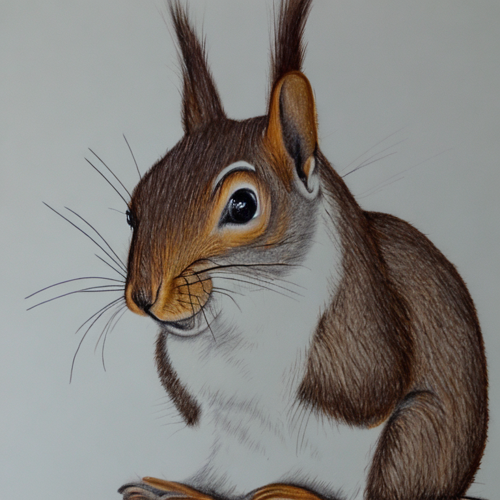

In [6]:
prompt = "A drawing of a squirrel on a completely white background."
print(prompt)

image = pipeline(prompt).images[0]

display(image.resize((500,500)))

### The diffusers library lets us control the initial noise

We observe that the same initial noise (same seed) generates similar images.

A drawing of a squirrel on a completely white background.


  0%|          | 0/50 [00:00<?, ?it/s]

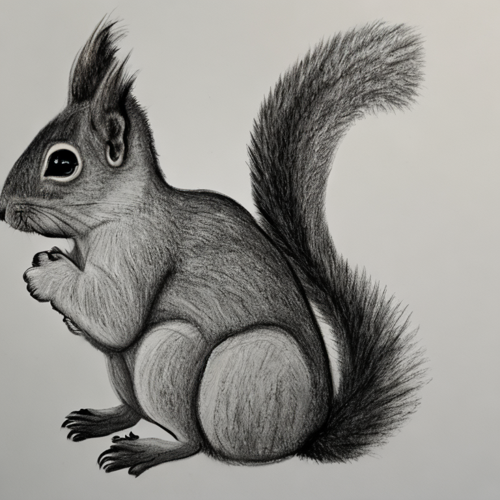

A colorful drawing of a squirrel on a completely white background.


  0%|          | 0/50 [00:00<?, ?it/s]

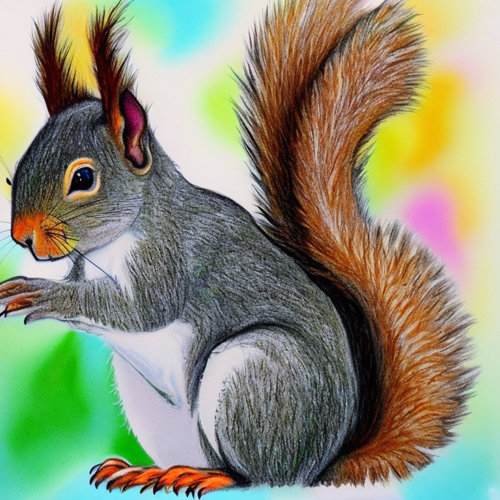

A realistic photograph of a squirrel on a completely white background.


  0%|          | 0/50 [00:00<?, ?it/s]

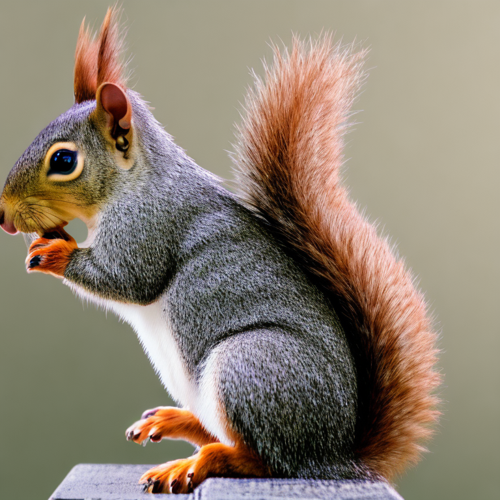

In [7]:
noise = randn_tensor((1, 4, 96, 96), device=gpu, dtype=torch.float16, generator=torch.manual_seed(123456))

prompt1 = "A drawing of a squirrel on a completely white background."
prompt2 = "A colorful drawing of a squirrel on a completely white background."
prompt3 = "A realistic photograph of a squirrel on a completely white background."

print(prompt1)
image1 = pipeline(
    prompt1,
    latents=noise
).images[0]
display(image1.resize((500,500)))

print(prompt2)
image2 = pipeline(
    prompt2,
    latents=noise
).images[0]
display(image2.resize((500,500)))

print(prompt3)
image3 = pipeline(
    prompt3,
    latents=noise
).images[0]
display(image3.resize((500,500)))


See also: https://huggingface.co/docs/diffusers/v0.13.0/en/using-diffusers/reusing_seeds

## Our solution

We fix the issues by exploiting the initial noise:

In [ ]:
noise = randn_tensor((1, 4, 96, 96), device=gpu, dtype=torch.float16, generator=torch.manual_seed(0))

signal_leak_white_background = torch.tensor(
    [[[[1.9]], [[1.3]], [[0.0]], [[-1.0]]]],
    device=gpu,
    dtype=torch.float16
)

initial_noise = 0.06826 * signal_leak_white_background + 0.99767 * noise

prompt = "A drawing of a squirrel on a white background."
print(prompt)

image = pipeline(
    prompt,
    latents=initial_noise
).images[0]
display(image.resize((500,500)))

In [ ]:
noise = randn_tensor((1, 4, 96, 96), device=gpu, dtype=torch.float16, generator=torch.manual_seed(0))

signal_leak_red_background = torch.tensor(
    [[[[0.0]], [[0.0]], [[-2.5]], [[0.0]]]],
    device=gpu,
    dtype=torch.float16
)

initial_noise = 0.06826 * signal_leak_red_background + 0.99767 * noise

prompt = "A solid red background."
print(prompt)

image = pipeline(
    prompt,
    latents=initial_noise
).images[0]
display(image.resize((500,500)))

## How are images generated?

Stable Diffusion generates images by iteratively denoising an initial noise.

In [ ]:
noise = randn_tensor((1, 4, 96, 96), device=gpu, dtype=torch.float16, generator=torch.manual_seed(0))

def decode_and_show(noisy_image):
    image = pipeline.vae.decode(noisy_image/pipeline.vae.config.scaling_factor, return_dict=False)[0]
    image = pipeline.image_processor.postprocess(image, output_type="pil")[0]
    display(image.resize((500,500)))

decode_and_show(noise)

Stable Diffusion uses timesteps to represent the current level of noise:
- $t=1000$: (almost) indistinguishable from noise
- $t=1$: (almost) clean original image

In [ ]:
num_inference_steps = 10
pipeline.scheduler.config.timestep_spacing = "trailing"
pipeline.scheduler.set_timesteps(num_inference_steps, device=gpu)
timesteps = pipeline.scheduler.timesteps
print(timesteps)

The textual prompt is preprocessed (encoded):

In [ ]:
prompt = "A drawing of a squirrel on completely white background."
prompt_embeds, negative_prompt_embeds = pipeline.encode_prompt(
    prompt=prompt,
    device=gpu,
    num_images_per_prompt=1,
    do_classifier_free_guidance=True
)
print(prompt_embeds)

At each timestep, the diffusion model predicts the clean image and denoise one step towards the predicted clean image

In [ ]:
def predict_original_image(noisy_image, t, guidance_scale=7.5):

    model_input = torch.cat([noisy_image] * 2)
    model_input = pipeline.scheduler.scale_model_input(model_input, t)

    model_output = pipeline.unet(
        model_input,
        t,
        encoder_hidden_states=torch.cat([negative_prompt_embeds, prompt_embeds]),
        return_dict=False,
    )[0]

    alpha_prod_t = pipeline.scheduler.alphas_cumprod[t]
    beta_prod_t = 1 - alpha_prod_t

    pred_original_sample = (alpha_prod_t**0.5) * noisy_image - (beta_prod_t**0.5) * model_output #velocity-prediction
    pred_uncond, pred_text = pred_original_sample.chunk(2)
    pred_original_sample = pred_uncond + guidance_scale * (pred_text - pred_uncond)

    return pred_original_sample

def denoise_one_step(noisy_image, predicted_clean_image, t, next_t):

    alpha_prod_t = pipeline.scheduler.alphas_cumprod[t]
    beta_prod_t = 1 - alpha_prod_t
    alpha_prod_t_next = pipeline.scheduler.alphas_cumprod[next_t]
    beta_prod_t_next = 1 - alpha_prod_t_next

    factor_noisy = (beta_prod_t_next/beta_prod_t)**0.5
    factor_prediction = alpha_prod_t_next**0.5-(beta_prod_t_next/beta_prod_t*alpha_prod_t)**0.5

    denoised_one_step = factor_noisy * noisy_image + factor_prediction * predicted_clean_image

    return denoised_one_step

In [ ]:
noisy_image = randn_tensor((1, 4, 96, 96), device=gpu, dtype=torch.float16, generator=torch.manual_seed(0))

for i in range(len(timesteps)):
    t = timesteps[i]
    print(t)

    decode_and_show(noisy_image)
    predicted_original_image = predict_original_image(noisy_image, t)
    decode_and_show(predicted_original_image)

    next_t = timesteps[i+1] if i+1<len(timesteps) else 0
    noisy_image = denoise_one_step(noisy_image, predicted_original_image, t, next_t)


## Which noise levels were used to train the model?

At timestep $t \in \{1, 2, 3, ..., 1000\}$, a noisy version $x_t$ of a original image $x_0$ is generated by the formula:

$$x_t = \sqrt{\bar{\alpha}_t} \, x_0 + \sqrt{1-\bar{\alpha}_t} \, \epsilon$$

where $\epsilon \sim \mathcal{N}(0, 1)$.

The values of $\sqrt{\bar{\alpha}_t}$ and $\sqrt{1-\bar{\alpha}_t}$ are as follows:

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot( (pipeline.scheduler.alphas_cumprod) **0.5, label=r'$\sqrt{\bar{\alpha}_t}$ = amount of clean image in the noisy image');
plt.plot( (1-pipeline.scheduler.alphas_cumprod) **0.5, label=r'$\sqrt{1-\bar{\alpha}_t}$ = amount of noise in the noisy image');
plt.legend();

Note that at the highest timestep ($t=1000$), the noisy image $x_t$ still contains $7\%$ of the original image $x_0$:

$$x_{1000} = \sqrt{\bar{\alpha}_{1000}} \, x_0 + \sqrt{1-\bar{\alpha}_{1000}} \, \epsilon$$
$$x_{1000} = 0.0683 \, x_0 + 0.9977 \, \epsilon$$

In [ ]:
alpha_prod_T = pipeline.scheduler.alphas_cumprod[999].item()
beta_prod_T = 1 - alpha_prod_T

print( alpha_prod_T**0.5 )
print( beta_prod_T**0.5 )

**Instead of starting denoising from complete noise, we should start from a mix of noise and $7\%$ of the image we want.**

## Details: Noise doesn't affect all frequencies equally

In [ ]:
image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/cat.png")
image = image.crop((150, 0, 150+704, 704))
image = image.resize((128, 128))
display(image)

In [ ]:
# Code heavily borrowed/inspired from https://www.youtube.com/watch?v=3C6yEYXDijM "Diffusion with Offset Noise" Nicholas Guttenberg 2023
np.random.seed(42)

image_orig = np.array(image).astype(np.float32)
image_orig = image_orig/255

image_orig -= 0.5
image_orig /= [0.229, 0.224, 0.225] #Scale to unit variance

kx,ky = np.meshgrid(np.arange(128), np.arange(128))

kx[kx>64] -= 128
ky[ky>64] -= 128

k2 = np.sqrt(kx*kx+ky*ky)[:,:,np.newaxis]
mask1 = k2 < 1
mask2 = (k2 >= 1)*(k2 < 4)
mask3 = (k2 >= 4)*(k2 < 8)
mask4 = (k2 >= 8)*(k2 < 16)
mask5 = (k2 >= 16)


for t in [0, 249, 499, 749, 999, -1]:

    alpha_prod_t = pipeline.scheduler.alphas_cumprod[t].item()
    beta_prod_t = 1 - alpha_prod_t

    if t==-1:
        noise = np.random.randn(128,128,3)
        image = noise
    else:
        noise = np.random.randn(128,128,3)
        image = alpha_prod_t**0.5 * image_orig + beta_prod_t**0.5 * noise


    fft_im = np.fft.fft2(image, axes=[0,1])

    all_compnts = image / (alpha_prod_t**0.5)
    lp1 = np.real(np.fft.ifft2(fft_im*mask1, axes=[0,1])) / (alpha_prod_t**0.5)
    lp2 = np.real(np.fft.ifft2(fft_im*mask2, axes=[0,1])) / (alpha_prod_t**0.5)
    lp3 = np.real(np.fft.ifft2(fft_im*mask3, axes=[0,1])) / (alpha_prod_t**0.5)
    lp4 = np.real(np.fft.ifft2(fft_im*mask4, axes=[0,1])) / (alpha_prod_t**0.5)
    lp5 = np.real(np.fft.ifft2(fft_im*mask5, axes=[0,1])) / (alpha_prod_t**0.5)

    images = []

    for i in [all_compnts, lp1, lp2, lp3, lp4, lp5]:


        total_image = i.copy()

        total_image *= [0.229, 0.224, 0.225]
        total_image += 0.5

        total_image = total_image*255
        total_image = np.clip(total_image, 0, 255)


        im = Image.fromarray(total_image.astype(np.uint8))
        images.append(im)


    fig, axs = plt.subplots(1, 6, figsize=(15, 3))
    titles = ['Noisy Image', 'DC', 'Low Freq', 'Mid Freq', 'High Freq', 'Very High Freq']

    for ax, im, title in zip(axs, images, titles):
        ax.imshow(im)
        ax.set_title(f'{title}')
        ax.axis('off')

    plt.show()

The diffusion model learns not to change the lowest-frequencies / DC components when denoising. If we do not include a signal leak at inference time, it generates greyish images.

## How do we sample the signal leak at inference time?

We can model very roughly the distribution of desired images by computing the mean and std (pixel-wise) of a small set of images of the desired style/LF. Here we use 4 images with white background (https://huggingface.co/sd-concepts-library/one-line-drawing).

In [ ]:
resolution = 768
train_transforms = transforms.Compose(
    [
        transforms.Resize(
            resolution, interpolation=transforms.InterpolationMode.BILINEAR
        ),
        transforms.CenterCrop(resolution),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ]
)
all_latents = []
for n in range(4):
    image = load_image(f"https://huggingface.co/sd-concepts-library/one-line-drawing/resolve/main/concept_images/{n}.jpeg").convert("RGB")
    pixel_values = train_transforms(image)
    # Collate
    pixel_values = torch.stack([pixel_values])
    pixel_values = pixel_values.to(memory_format=torch.contiguous_format).to(dtype=torch.float16)
    pixel_values = pixel_values.to(pipeline.vae.device)
    # Encode
    latents = pipeline.vae.encode(pixel_values).latent_dist.mode()
    latents *= pipeline.vae.config.scaling_factor
    all_latents.append(latents)

mean = torch.mean(torch.cat(all_latents), dim=0, keepdim=True)
std = torch.std(torch.cat(all_latents), dim=0, keepdim=True)

for s in range(4):
    signal_leak = mean+std*randn_tensor((1, 4, 96, 96), device=gpu, dtype=torch.float16, generator=torch.manual_seed(s))
    decode_and_show(signal_leak)

We use these mean and std to inject a signal leak in the initial noise at inference time.

The generated images have a white background if we start denoising with a signal leak in the initial noise.

In [ ]:
initial_noise = randn_tensor((1, 4, 96, 96), device=gpu, dtype=torch.float16, generator=torch.manual_seed(0))
signal_leak = mean+std*randn_tensor((1, 4, 96, 96), device=gpu, dtype=torch.float16, generator=torch.manual_seed(0))

alpha_prod_T = pipeline.scheduler.alphas_cumprod[999].item()
beta_prod_T = 1 - alpha_prod_T

noisy_image = alpha_prod_T**0.5 * signal_leak + beta_prod_T**0.5 * initial_noise

for i in range(len(timesteps)):
    t = timesteps[i]
    print(t)

    decode_and_show(noisy_image)
    predicted_original_image = predict_original_image(noisy_image, t)
    decode_and_show(predicted_original_image)

    next_t = timesteps[i+1] if i+1<len(timesteps) else 0
    noisy_image = denoise_one_step(noisy_image, predicted_original_image, t, next_t)


## Comparison

In [ ]:
noise_without_signal_leak = randn_tensor((1, 4, 96, 96), device=gpu, dtype=torch.float16, generator=torch.manual_seed(0))

signal_leak = mean+std*randn_tensor((1, 4, 96, 96), device=gpu, dtype=torch.float16, generator=torch.manual_seed(0))

noise_with_signal_leak = (
    alpha_prod_T**0.5 * signal_leak
    + beta_prod_T**0.5 * noise_without_signal_leak
)

prompt = "A drawing of a squirrel on a white background."

print(prompt)
image1 = pipeline(
    prompt,
    latents=noise_without_signal_leak
).images[0]
display(image1.resize((500,500)))

print(prompt)
image2 = pipeline(
    prompt,
    latents=noise_with_signal_leak
).images[0]
display(image2.resize((500,500)))

In [ ]:
noise_without_signal_leak = randn_tensor((1, 4, 96, 96), device=gpu, dtype=torch.float16, generator=torch.manual_seed(0))

signal_leak = mean+std*randn_tensor((1, 4, 96, 96), device=gpu, dtype=torch.float16, generator=torch.manual_seed(123456))

noise_with_signal_leak = (
    alpha_prod_T**0.5 * signal_leak
    + beta_prod_T**0.5 * noise_without_signal_leak
)

prompt = "A drawing of a Rubiks's cube on a white background."

print(prompt)
image1 = pipeline(
    prompt,
    latents=noise_without_signal_leak
).images[0]
display(image1.resize((500,500)))

print(prompt)
image2 = pipeline(
    prompt,
    latents=noise_with_signal_leak
).images[0]
display(image2.resize((500,500)))

We can also select the signal leak "manually":

In [ ]:
initial_noise = randn_tensor((1, 4, 96, 96), device=gpu, dtype=torch.float16, generator=torch.manual_seed(0))
signal_leak_zero = torch.tensor([[[[0.0]], [[0.0]], [[0.0]], [[0.0]]]], device=gpu, dtype=torch.float16)
signal_leak_white_background = torch.tensor([[[[1.9]], [[1.3]], [[0.0]], [[-1.0]]]], device=gpu, dtype=torch.float16)
signal_leak_red_background = torch.tensor([[[[0.0]], [[0.0]], [[-2.5]], [[0.0]]]], device=gpu, dtype=torch.float16)
signal_leak_red_background_weaker = torch.tensor([[[[0.0]], [[0.0]], [[-0.5]], [[0.0]]]], device=gpu, dtype=torch.float16)


prompt = "A professional photograph of an astronaut mowing the lawn. Moon in the background. Colorful image, hyperrealistic, fantasy, dark art."

print(prompt)
image1 = pipeline(
    prompt,
    latents=alpha_prod_T**0.5 * signal_leak_zero + beta_prod_T**0.5 * initial_noise
).images[0]
display(image1.resize((500,500)))

print(prompt)
image2 = pipeline(
    prompt,
    latents=alpha_prod_T**0.5 * signal_leak_white_background + beta_prod_T**0.5 * initial_noise
).images[0]
display(image2.resize((500,500)))

print(prompt)
image3 = pipeline(
    prompt,
    latents=alpha_prod_T**0.5 * signal_leak_red_background + beta_prod_T**0.5 * initial_noise
).images[0]
display(image3.resize((500,500)))

print(prompt)
image4 = pipeline(
    prompt,
    latents=alpha_prod_T**0.5 * signal_leak_red_background_weaker + beta_prod_T**0.5 * initial_noise
).images[0]
display(image4.resize((500,500)))

## Conclusion

There is a discrepancy between inference and training in Stable Diffusion v1 and v2.
They contain a signal leak during training but not during inference.
**We propose to inject a signal leak in the initial noise at inference time** to fix this disrepency.
We can bias the image generation **toward a desired specific color distribution or a specific style**.
This simple step does not require any fine-tuning making it **much simpler** than existing approaches for style or color-specific image generation.
We encourage future research to account for training and inference distribution gap when training or fine-tuning diffusion models, and to include a signal leak in the initial noise at inference time as well, in order to mirror the training process and achieve visually more pleasing results.

Project page: https://ivrl.github.io/signal-leak-bias/

Code: https://github.com/IVRL/signal-leak-bias

License: Non-Commercial License https://github.com/IVRL/signal-leak-bias/blob/main/LICENSE